# Estimating External Non-Mandatory Tour Identification Model

This notebook re-estimates ActivitySim external non-mandatory tour identification model in Larch. 

# Load libraries

In [1]:
import os
import larch  # !conda install larch -c conda-forge # for estimation
import pandas as pd
import numpy as np
from larch import P, X
import matplotlib.pyplot as plt

# Create data items that need to be created in the choosers table

In [2]:
os.chdir('/projects/SANDAG/2017 On-Call Modeling Services/Area B/TO 05 - ABM3/estimation/output/estimation_data_bundle/external_non_mandatory_identification')
choosers_data = pd.read_csv("external_non_mandatory_identification_values_combined_orig.csv",low_memory=False)
choosers_data['util_log_size'] = np.log1p(choosers_data['util_size_of_nearest_ext_station'])
choosers_data['util_inc_lt15'] = np.where(choosers_data['income']<15000,1,0)
choosers_data['util_inc_15_50'] = np.where((choosers_data['income']>=15000) * (choosers_data['income']<=49999),1,0)
#choosers_data['util_inc_25_50'] = np.where((choosers_data['income']>=25000) * (choosers_data['income']<=49999),1,0)
choosers_data['util_inc_100_250'] = np.where((choosers_data['income']>=100000) * (choosers_data['income']<=249999),1,0)
#choosers_data['util_inc_150_250'] = np.where((choosers_data['income']>=150000) * (choosers_data['income']<=249999),1,0)
choosers_data['util_inc_250plus'] = np.where(choosers_data['income']>=250000,1,0)
choosers_data['util_2016'] = np.where(choosers_data['survey_year']==2016,1,0)
choosers_data['util_autos_0'] = np.where(choosers_data['auto_ownership']==0,1,0)
choosers_data['util_dist_lt_2p5'] = np.where(choosers_data['dist_to_external_zone']<2.5,1,0)


#write data to file
if os.path.exists("external_non_mandatory_identification_values_combined_orig.csv")!=True:
  shutil.copy2('external_non_mandatory_identification_values_combined.csv','external_non_mandatory_identification_values_combined_orig.csv')
choosers_data.to_csv("external_non_mandatory_identification_values_combined.csv", index=False)

# Load data and prep model for estimation

In [3]:
os.chdir('/projects/SANDAG/2017 On-Call Modeling Services/Area B/TO 05 - ABM3/estimation')
modelname = "external_non_mandatory_identification"

from activitysim.estimation.larch import component_model
model, data = component_model(modelname, return_data=True)

c:\development\projects\sandag_activitysim\activitysim\estimation\larch\simple_simulate.py:66: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(os.path.join(edb_directory, filename), **kwargs)


# Review data loaded from the EDB

The next step is to read the EDB, including the coefficients, model settings, utilities specification, and chooser and alternative data.

### Coefficients

In [4]:
data.coefficients

,value,constrain
coefficient_name,,
coef_dist_to_nearest_ext_station,0,F
coef_log_size_of_nearest_ext_station,0,F
coef_escort,0,F
coef_shopping,0,F
coef_othmaint,0,F
coef_eatout,0,F
coef_social,0,F
coef_othdiscr,0,F
coef_income_lt_15,0,F


#### Utility specification

In [5]:
data.spec

,Label,Description,Expression,external_tour,internal_tour
0,util_dist_to_nearest_ext_station,Distance to nearest external station,dist_to_external_zone,coef_dist_to_nearest_ext_station,NaN
1,util_log_size,Log size of nearest station,@np.log1p(choosers_data['util_size_of_nearest_...,coef_log_size_of_nearest_ext_station,NaN
2,util_escort,escort tour ASC,"@np.where(df.tour_type == 'escort', 1, 0)",coef_escort,NaN
3,util_shopping,shopping tour ASC,"@np.where(df.tour_type == 'shopping', 1, 0)",coef_shopping,NaN
4,util_othmaint,othmaint tour ASC,"@np.where(df.tour_type == 'othmaint', 1, 0)",coef_othmaint,NaN
5,util_eatout,eatout tour ASC,"@np.where(df.tour_type == 'eatout', 1, 0)",coef_eatout,NaN
6,util_social,social tour ASC,"@np.where(df.tour_type == 'social', 1, 0)",coef_social,NaN
7,util_othdiscr,othdiscr tour ASC,"@np.where(df.tour_type == 'othdiscr', 1, 0)",coef_othdiscr,NaN
8,util_inc_lt15,Income less than $15k,"@np.where(choosers_data['income']<15000,1,0)",coef_income_lt_15,NaN
9,util_inc_15_50,Income 15 to 50k,@np.where((choosers_data['income']>=15000) * (...,coef income_15_50,NaN


## Explore data

In [6]:
data.chooser_data

,model_choice,override_choice,util_dist_to_nearest_ext_station,util_size_of_nearest_ext_station,util_shopping,util_social,util_othmaint,util_othdiscr,util_eatout,util_escort,...,dist_to_external_zone,util_log_size,util_inc_lt15,util_inc_15_50,util_inc_100_250,util_inc_250plus,util_2016,util_autos_0,util_dist_lt_2p5,override_choice_code
tour_id,,,,,,,,,,,,,,,,,,,,,
56,0,1,31.054558,27071.0,0.0,0.0,0.0,0.0,1.0,0.0,...,31.054558,10.206255,0,0,0,0,1,0,0,2
59,0,1,31.054558,27071.0,0.0,0.0,0.0,0.0,0.0,1.0,...,31.054558,10.206255,0,0,0,0,1,0,0,2
75,0,1,31.054558,27071.0,0.0,0.0,0.0,1.0,0.0,0.0,...,31.054558,10.206255,0,0,0,0,1,0,0,2
125,0,1,31.054558,27071.0,0.0,0.0,0.0,1.0,0.0,0.0,...,31.054558,10.206255,0,0,0,0,1,0,0,2
225,0,1,31.054558,27071.0,0.0,0.0,0.0,1.0,0.0,0.0,...,31.054558,10.206255,0,0,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4843241,0,1,27.603632,27071.0,1.0,0.0,0.0,0.0,0.0,0.0,...,27.603632,10.206255,0,0,0,0,0,0,0,2
4843279,0,1,27.603632,27071.0,0.0,0.0,1.0,0.0,0.0,0.0,...,27.603632,10.206255,0,0,0,0,0,0,0,2
4843491,0,1,17.317631,27071.0,1.0,0.0,0.0,0.0,0.0,0.0,...,17.317631,10.206255,0,0,0,0,0,1,0,2


In [7]:
pd.crosstab(data.chooser_data.closest_external_zone, data.chooser_data.override_choice, margins=True)

override_choice,0,1,All
closest_external_zone,,,
24323,2,0,2
24324,5,11,16
24325,3,74,77
24326,96,3929,4025
24327,36,2038,2074
24328,107,15292,15399
24329,32,3188,3220
24330,1,110,111
All,282,24642,24924


In [8]:
pd.crosstab(data.chooser_data.tour_type, data.chooser_data.override_choice, margins=True)

override_choice,0,1,All
tour_type,,,
eatout,23,2451,2474
escort,23,4084,4107
othdiscr,50,6441,6491
othmaint,140,6721,6861
shopping,34,4265,4299
social,12,680,692
All,282,24642,24924


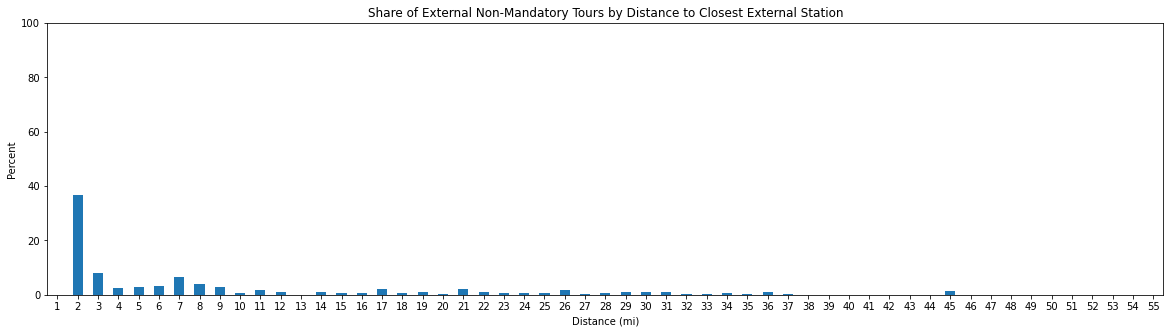

In [9]:
#plt.hist(data.chooser_data['distance_int'],range=(0, data.chooser_data['distance_int'].max()), bins=data.chooser_data['distance_int'].max() + 1)
data.chooser_data['external_tour'] = np.where(data.chooser_data["override_choice"]==1,0,1)
data.chooser_data['distance_int']=data.chooser_data['util_dist_to_nearest_ext_station'].astype(int)
plot_df = data.chooser_data.groupby('distance_int')['external_tour'].mean().mul(100).reindex(range(data.chooser_data.distance_int.min()-1,data.chooser_data.distance_int.max()), fill_value=0)

ax = plot_df.plot(kind='bar',rot = 0,title='Share of External Non-Mandatory Tours by Distance to Closest External Station',ylim=[0, 100], xlabel="Distance (mi)", ylabel="Percent",  figsize=(20, 5))

plt.show()

In [10]:
chooser_data_lt1mi= data.chooser_data[data.chooser_data["distance_int"]<=2]
pd.crosstab(chooser_data_lt1mi.closest_external_zone, chooser_data_lt1mi.override_choice, margins=True)

override_choice,0,1,All
closest_external_zone,,,
24327,14,18,32
24328,0,6,6
All,14,24,38


# Set Coefficients

In [11]:
dir(model)
print(model.utility_co)

DictOfLinearFunction_C({1:   P.coef_dist_to_nearest_ext_station * X.util_dist_to_nearest_ext_station
+ P.coef_log_size_of_nearest_ext_station * X.util_log_size
+ P.coef_escort * X.util_escort
+ P.coef_shopping * X.util_shopping
+ P.coef_othmaint * X.util_othmaint
+ P.coef_eatout * X.util_eatout
+ P.coef_social * X.util_social
+ P.coef_othdiscr * X.util_othdiscr
+ P.coef_income_lt_15 * X.util_inc_lt15
+ P('coef income_15_50') * X.util_inc_15_50
+ P.coef_income_100_250 * X.util_inc_100_250
+ P.coef_income_250_plus * X.util_inc_250plus
+ P.coef_autos_0 * X.util_autos_0
+ P('-999') * X.util_global_switch
+ P.coef_dist_lt_2p5 * X.util_dist_lt_2p5, 2: <Empty LinearFunction_C>})


In [12]:
#model.utility_co = {0: P.coef_dist_to_nearest_ext_station * X.util_dist_to_nearest_ext_station
#+ P.coef_size_of_nearest_ext_station * X.util_size_of_nearest_ext_station
#+ P.coef_part_time * X.parttime
#+ P.coef_agriculture * X.agriculture
#+ P.coef_business_srv * X.business_srv
#+ P.coef_construction * X.construction
#+ P.coef_education * X.education
#+ P.coef_entertainment * X.entertainment
#+ P.coef_food_srv * X.food_srv                   
#+ P.coef_government * X.government
#+ P.coef_healthcare * X.healthcare                   
#+ P.coef_manufacturing * X.manufacturing
#+ P.coef_mgmt_srv * X.mgmt_srv
#+ P.coef_military * X.military
#+ P.coef_retail * X.retail    
#+ P.coef_inc_lt15 * X("income<15000")
#+ P.coef_inc_15_25 * X("(income>=15000) * (income<25000)") 
#+ P.coef_inc_25_50 * X("(income>=25000) * (income<50000)") 
#+ P.coef_inc_100_150 * X.income_100_150 
#+ P.coef_inc_150_250 * X("(income>=150000) * (income<250000)")  
#+ P.coef_inc_250plus * X("income>=250000")
#+ P.asc_external_2016 * X.year_2016         
#+ P.coef_dist_lt_2p5 * X("util_dist_to_nearest_ext_station<2.5")                    
#+ P.asc_external_worker * X.util_asc_placeholder, 1: 0}

# Estimate

With the model setup for estimation, the next step is to estimate the model coefficients.  Make sure to use a sufficiently large enough household sample and set of zones to avoid an over-specified model, which does not have a numerically stable likelihood maximizing solution.  Larch has a built-in estimation methods including BHHH, and also offers access to more advanced general purpose non-linear optimizers in the `scipy` package, including SLSQP, which allows for bounds and constraints on parameters.  BHHH is the default and typically runs faster, but does not follow constraints on parameters.

In [13]:
model.load_data()
#model.doctor(repair_ch_av="-")

req_data does not request avail_ca or avail_co but it is set and being provided
converting data_co to <class 'numpy.float64'>


In [14]:
model.maximize_loglike(method="SLSQP", options={"maxiter": 1000})


,value,initvalue,nullvalue,minimum,maximum,holdfast,note,best
-999,-999.000000,-999.0,-999.0,-999.0,-999.0,1,,-999.000000
coef income_15_50,-0.253399,0.0,0.0,NaN,NaN,0,,-0.253399
coef_autos_0,-0.550541,0.0,0.0,NaN,NaN,0,,-0.550541
coef_dist_lt_2p5,2.649598,0.0,0.0,NaN,NaN,0,,2.649598
coef_dist_to_nearest_ext_station,-0.069134,0.0,0.0,NaN,NaN,0,,-0.069134
coef_eatout,-7.276681,0.0,0.0,NaN,NaN,0,,-7.276681
coef_escort,-8.056823,0.0,0.0,NaN,NaN,0,,-8.056823
coef_income_100_250,0.118113,0.0,0.0,NaN,NaN,0,,0.118113
coef_income_250_plus,0.622113,0.0,0.0,NaN,NaN,0,,0.622113
coef_income_lt_15,-0.706807,0.0,0.0,NaN,NaN,0,,-0.706807


┣                x: -999                                   -999.000000
┃                   coef income_15_50                        -0.253399
┃                   coef_autos_0                             -0.550541
┃                   coef_dist_lt_2p5                          2.649598
┃                   coef_dist_to_nearest_ext_station         -0.069134
┃                   coef_eatout                              -7.276681
┃                   coef_escort                              -8.056823
┃                   coef_income_100_250                       0.118113
┃                   coef_income_250_plus                      0.622113
┃                   coef_income_lt_15                        -0.706807
┃                   coef_log_size_of_nearest_ext_station      0.404350
┃                   coef_othdiscr                            -7.415691
┃                   coef_othmaint                            -6.453644
┃                   coef_shopping                            -7.413631
┃                   coef_social                              -6.566754
┃                   dtype: float64
┣          loglike: -1421.8143387719294
┣        d_loglike: -999                                    0.000000
┃                   coef income_15_50                      -0.001533
┃                   coef_autos_0                            0.000184
┃                   coef_dist_lt_2p5                        0.001367
┃                   coef_dist_to_nearest_ext_station        0.004910
┃                   coef_eatout                            -0.000888
┃                   coef_escort                             0.000831
┃                   coef_income_100_250                     0.002791
┃                   coef_income_250_plus                    0.000337
┃                   coef_income_lt_15                       0.000191
┃                   coef_log_size_of_nearest_ext_station    0.011052
┃                   coef_othdiscr                           0.000876
┃                   coef_othmaint                          -0.000003
┃                   coef_shopping                           0.001754
┃                   coef_social                            -0.001483
┃                   dtype: float64
┣              nit: 45
┣             nfev: 85
┣             njev: 45
┣           status: 0
┣          message: 'Optimization terminated successfully'
┣          success: True
┣     elapsed_time: datetime.timedelta(seconds=29, microseconds=886190)
┣           method: 'SLSQP'
┣          n_cases: 24924
┣ iteration_number: 45
┣          logloss: 0.05704599337072418

### Estimated coefficients

In [15]:
model.calculate_parameter_covariance()
result_dir='/projects/SANDAG/2017 On-Call Modeling Services/Area B/TO 05 - ABM3/estimation/'
model.to_xlsx(
        result_dir+"ext_nonmandatory_id_003.xlsx", 
        data_statistics=True,
    )

C:\Users\joel.freedman\Anaconda3\envs\asim_est\lib\site-packages\larch\util\excel.py:523: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  xl = ExcelWriter(filename, engine='xlsxwriter_larch', model=model, **kwargs)


# Output Estimation Results

In [16]:
from activitysim.estimation.larch import update_coefficients
result_dir = data.edb_directory/"estimated"
update_coefficients(
    model, data, result_dir,
    output_file=f"{modelname}_coefficients_003.csv",
);

In [17]:
#larch.__version__

In [18]:
#result_dir

### Write the model estimation report, including coefficient t-statistic and log likelihood

# Next Steps

The final step is to either manually or automatically copy the `*_coefficients_revised.csv` file to the configs folder, rename it to `*_coefficients.csv`, and run ActivitySim in simulation mode.

In [19]:
#pd.read_csv(result_dir/f"{modelname}_coefficients_revised.csv")